# Свойства оценок. Задача 2

__Ильичёв А.С., 693__

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#### 1. Сгенерируем выборку $X_1, \dots, X_N$ из экспоненциального распределения с параметром $\theta = 1$ для $N=10^4$.

In [2]:
N = 10 ** 4
ns = np.arange(1, N + 1)
theta = 1
sample = np.random.exponential(theta, N)

#### 2. Для всех $n \le N$ посчитаем оценку параметра ${\left(k!/\overline{X^k}\right)}^{1/k}$ для разных $k$.

In [8]:
ks = [1, 2, 3, 4, 5, 6, 8, 10, 13, 15, 20]

In [9]:
def make_estimators(ks): # функция построения массива оценок
    est = []
    for k in ks:
        est.append([(np.math.factorial(k)/(sample[:i]**k).mean())**(1/k) for i in ns])
    return np.array(est)

In [10]:
est = make_estimators(ks)

#### 3. Построим на одном графике для всех оценок функции модуля разности оценки и истинного значения $\theta$  в зависимости от $k$

In [62]:
def make_plot(exclude=set(), low_limit=True):
    plt.figure(figsize=(10, 5))
    est_nums = list(set(np.arange(len(est))) - exclude) # set difference
    for est_num in est_nums:
        plt.plot(ns, np.abs(est[est_num] - theta), label=str(ks[est_num]))
    plt.xlabel('n')
    plt.ylabel(r'$|\hat \theta_n - \theta|$')
    plt.legend(title=r'k')
    plt.title(r'$\theta = $'+str(theta))
    plt.ylim(0, 1)
    if low_limit:
        plt.ylim(0, 0.15)

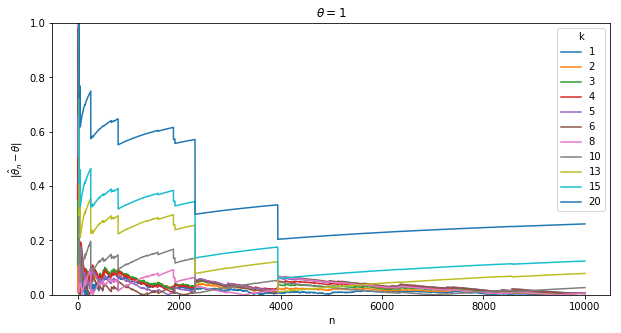

In [63]:
make_plot(low_limit=False)

Как видно, при больших $k$ оценки сильно отличаются от истинного значения. Кроме того, у графиков при больших $k$ одинаковые изломы. Это можно объяснить следующим образом. Предположим, в выборке появилось значение, сильно отклоняющееся от среднего по выборке, тогда, чем больше $k$, тем сильнее это значение повлияет на статистику $\overline{X^k}$. Эти резкие изменения мы и видим на изломах. Для демонстрации построим зависимость максимального значения в выборке $X_1, \dots, X_n$ от $n$, и рядом график модуля разности оценки и истинного значения $\theta$  для $k=20$, умноженного на 10 (тут важна только форма кривых).

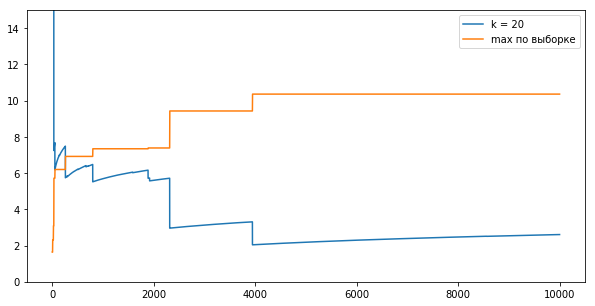

In [64]:
maxs = [np.max(sample[:i]) for i in ns]
plt.figure(figsize=(10, 5))
plt.plot(ns, 10 * np.abs(est[len(est) - 1] - theta), label='k = 20')
plt.plot(ns, maxs, label='max по выборке')
plt.legend()
plt.ylim(0, 15)
plt.show()

Предположение оказалось верным. Исключим теперь большие $k$ из рассмотрения (оставим первые 5) и ограничим масштаб.

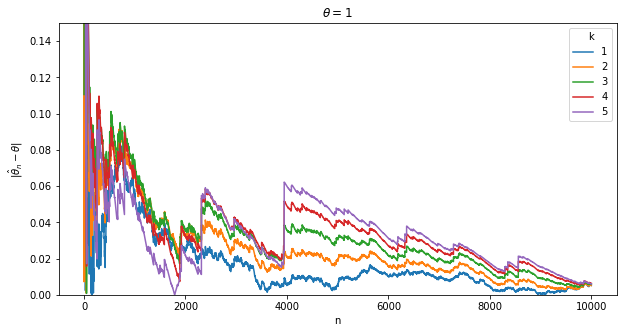

In [65]:
make_plot(exclude=set(range(5, len(ks))))

#### 4. Сделаем выводы.



Как видно из графиков, чем меньше $k$, тем лучше ведет себя оценка. Действительно, асимптотическая дисперсия этой оценки, как следует из решения теоретической  задачи, является возрастающей по $k$ функцией (в числителе факториалы $k$), а чем меньше дисперсия, тем ближе к нулю будет модуль разности оценки и истинного значения параметра.